<a href="https://colab.research.google.com/github/wachira-samuel/Pandas-tutorials/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
In today's session, we're going to cover **the basics of exploratory data analysis using Python. **

Exploratory data analysis or in short, EDA, is an approach to analyze data in order to:


*  Summarize main characteristics of the data
*   Gain better understanding of the data set
*   Uncover relationships between different variables and extract important variables for the problem we're trying to solve.


**The main question we are trying to answer in this module is, what are the characteristics that have the most impact on the car price? **

We will be going through a couple of different useful exploratory data analysis techniques in order to answer this question.

We will learn about:

*   Descriptive statistics which describe basic features of a data set and obtains a short summary about the sample and measures of the data. Describe Function, Value_Counts Function, Box Plot, Scatter Plot.

*   Basic of grouping data using GroupBy and how this can help to transform our data set.

*   The correlation between different variables.

*   Advanced correlation, where we'll introduce you to various correlation statistical methods, namely Pearson correlation and correlation heatmaps.









In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr


In [ ]:
#Importing the dataset
df = pd.read_csv("autos.csv")
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


## **Descriptive Statistics**

 When you begin to analyze data, it's important to first explore your data before you spend time building complicated models.

 One easy way to do so is to calculate some descriptive statistics for your data.

 Descriptive statistical analysis helps to describe basic features of a dataset and obtains a short summary about the sample and measures of the data.

 Let's have a couple different useful methods.

 One way in which we can do this is by using the describe function in pandas. Using the describe function and applying it on your data frame, a describe function automatically computes basic statistics for all numerical variables.

 It shows the mean, the total number of data points, the standard deviation, the quartiles, and the extreme values. Any NaN values are automatically skipped in these statistics. This function will give you a clearer idea of the distribution of your different variables.

In [ ]:
df.describe(include = "all")

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,164.000000,201,201,201,199,201,201,201,...,201.000000,201,197.000000,197.000000,201.000000,199.000000,199.000000,201.000000,201.000000,201.000000
unique,NaN,NaN,NaN,22,2,2,2,5,3,2,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,32,181,165,113,94,118,198,...,NaN,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,102.900498,0.840796,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,126.875622,NaN,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,59.234956,1.254802,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.546834,NaN,0.270793,0.319256,4.004965,37.553843,480.521824,6.423220,6.815150,7947.066342
min,0.000000,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,53.000000,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


### Value_Counts
You could have also categorical variables in your dataset.

These are variables that can be divided up into different categories or groups and have discrete values.

For example, in our dataset, we have the drive system as a categorical variable, which consists of the categories forward wheel-drive, rear wheel-drive, and four wheel-drive.

One way we can summarize the categorical data is by using the function *value_counts*.

In [ ]:
drive_wheels_counts=df["drive-wheels"].value_counts()
drive_wheels_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [ ]:
num_of_doors_count = df["num-of-doors"].value_counts()
num_of_doors_count

,count
num-of-doors,
four,113
two,86


* We see that we have 118 cars in the front wheel-drive category, 75 cars in the rear wheel-drive category, and eight cars in the four wheel-drive category.


### Box plots
Box plots are a great way to visualize numeric data, since you can visualize the various distributions of the data.

The main features that the box plot shows are the median of the data which represents where the middle data point is, the upper quartile shows where the 75th percentile is, the lower quartile shows where the 25th percentile is. The data between the upper and lower quartile represents the inter-quartile range. Next, you have the lower and upper extremes. These are calculated as 1.5 times the inter-quartile range above the 75th percentile, and as 1.5 times the IQR below the 25th percentile.

Finally, box plots also display outliers as individual dots that occur outside the upper and lower extremes.

With box plots, you can easily spot outliers and also see the distribution and skewness of the data.

Box plots make it easy to compare between groups.

<Axes: xlabel='drive-wheels', ylabel='price'>

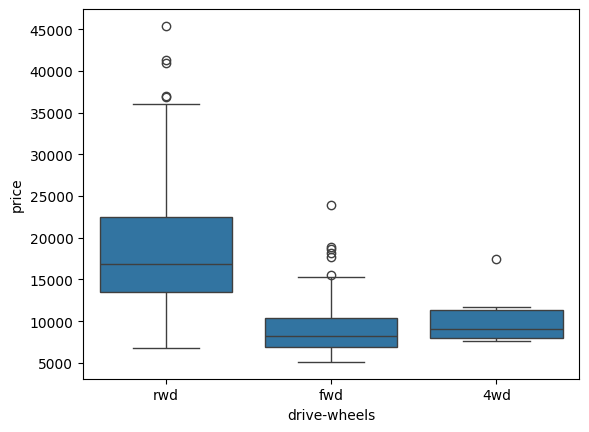

In [ ]:
sns.boxplot(x = "drive-wheels", y = "price", data = df)

* In this example, using box plot, we can see the distribution of different categories of the drive-wheels feature over price feature. We can see that the distribution of price between the rear wheel-drive and the other categories are distinct. But the price for front wheel-drive and four wheel-drive are almost indistinguishable.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         201 non-null    int64  
 1   symboling          201 non-null    int64  
 2   normalized-losses  164 non-null    float64
 3   make               201 non-null    object 
 4   fuel-type          201 non-null    object 
 5   aspiration         201 non-null    object 
 6   num-of-doors       199 non-null    object 
 7   body-style         201 non-null    object 
 8   drive-wheels       201 non-null    object 
 9   engine-location    201 non-null    object 
 10  wheel-base         201 non-null    float64
 11  length             201 non-null    float64
 12  width              201 non-null    float64
 13  height             201 non-null    float64
 14  curb-weight        201 non-null    int64  
 15  engine-type        201 non-null    object 
 16  num-of-cylinders   201 non

### Scatter Plots.
Oftentimes, we tend to see continuous variables in our data.

These data points are numbers contained in some range.

For example, in our dataset, price and engine size are continuous variables.

What if we want to understand the relationship between engine size and price?
Could engine size possibly predict the price of a car?

One good way to visualize this is using a scatter plot. Each observation in a scatter plot is represented as a point. This plot shows the relationship between two variables. The predictor variable is the variable that you are using to predict an outcome. In this case, our predictor variable is the engine size. The target variable is the variable that you are trying to predict. In this case, our target variable is the price since this would be the outcome.

In a scatter plot, we typically set the predictor variable on the x-axis or horizontal axis, and we set the target variable on the y-axis or vertical axis.

In this case, we will thus plot the engine size on the x-axis and the price on the y-axis. We are using the Matplotlib function scatter here, taking in x and a y variable.

Text(0, 0.5, 'Price')

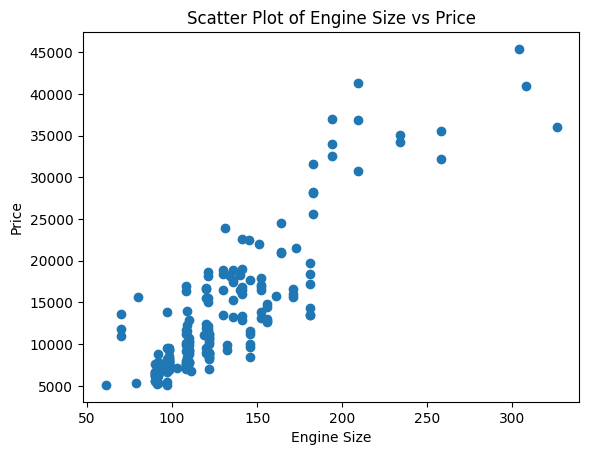

In [ ]:
y = df["price"]
x = df["engine-size"]
plt.scatter(x,y)
plt.title("Scatter Plot of Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")

* Something to note is that it's always important to label your axes and write a general plot title so that you know what you're looking at. Now, how is the variable engine size related to price? From the scatter plot, we see that as the engine size goes up, the price of the car also goes up. This is giving us an initial indication that there is a positive linear relationship between these two variables.

In [ ]:
df.tail()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
196,200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845
197,201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045
198,202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485
199,203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470
200,204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625


# **GroupBy in Python**


We'll cover the basics of grouping and how this can help to transform our data set.

Assume you want to know, is there any relationship between the different types of drive system, forward, rear, and four-wheel drive, and the price of the vehicles.

If so, which type of drive system adds the most value to a vehicle?

It would be nice if we could group all the data by the different types of drive wheels and compare the results of these different drive wheels against each other.

In Pandas, this can be done using the groupby method.

The groupby method is used on categorical variables, groups the data into subsets according to the different categories of that variable, you can group by a single variable, or you can group by multiple variables by passing in multiple variable names.

As an example, let's say we are interested in finding the average price of vehicles and observe how they differ between different types of body styles and drive wheels variables. To do this, we first pick out the three data columns we are interested in, which is done in the first line of code.

In [ ]:
df_1 = df[["drive-wheels", "price"]]
df_1.head()

,drive-wheels,price
0,rwd,13495
1,rwd,16500
2,rwd,16500
3,fwd,13950
4,4wd,17450


In [ ]:
df_1grp = df_1.groupby(["drive-wheels"], as_index = False).mean()
df_1grp

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [ ]:
df[["body-style"]].value_counts()

,count
body-style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


In [ ]:
df_test = df[["drive-wheels", "body-style", "price"]]
df_test.head()

,drive-wheels,body-style,price
0,rwd,convertible,13495
1,rwd,convertible,16500
2,rwd,hatchback,16500
3,fwd,sedan,13950
4,4wd,sedan,17450


We then group the reduced data according to drive wheels and body style in the second line. Since we are interested in knowing how the average price differs across the board, we can take the mean of each group and append at this bit at the very end of the next line of code.

In [ ]:
df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index = False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


The data is now grouped into subcategories, and only the average price of each subcategory is shown. We can see that according to our data, rear-wheel drive convertibles and rear-wheel drive hardtops have the highest value, while four-wheel drive hatchbacks have the lowest value. A table of this form isn't the easiest to read and also not very easy to visualize. To make it easier to understand, we can transform this table to a pivot table by using the pivot method.

In the previous table, both drive wheels and body style were listed in columns. A pivot table has one variable displayed along the columns and the other variable displayed along the rows. Just with one line of code and by using the Pandas pivot method, we can pivot the body style variable so it is displayed along the columns, and the drive wheels will be displayed along the rows.

In [ ]:
df[['price', 'body-style']]

,price,body-style
0,13495,convertible
1,16500,convertible
2,16500,hatchback
3,13950,sedan
4,17450,sedan
...,...,...
196,16845,sedan
197,19045,sedan
198,21485,sedan
199,22470,sedan


In [ ]:
df_pivot = df_grp.pivot(index = "drive-wheels", columns = "body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

 The price data now becomes a rectangular grid, which is easier to visualize. This is similar to what is usually done in Excel spreadsheets.

### Heat Map Plot
Another way to represent the pivot table is using a heat map plot. Heat map takes a rectangular grid of data and assigns a color intensity based on the data value at the grid points.

It is a great way to plot the target variable over multiple variables, and through this, get visual clues of the relationship between these variables and the target.

In this example, we use Pyplot's pcolor method to plot heat map and convert the previous pivot table into a graphical form. We specified the red-blue color scheme.

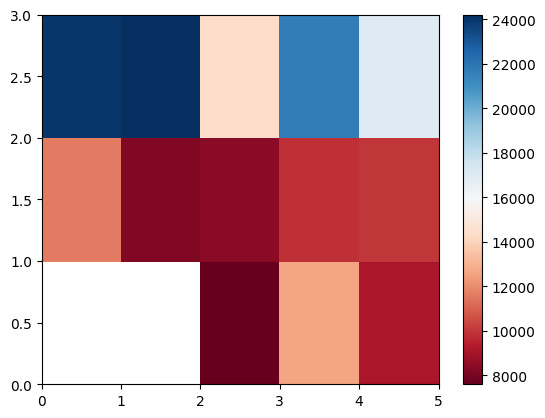

In [ ]:
plt.pcolor(df_pivot, cmap="RdBu")
plt.colorbar()
plt.show()

* In the output plot, each type of body style is numbered along the x-axis, and each type of drive wheels is numbered along the y-axis. The average prices are plotted with varying colors based on their values according to the color bar. We see that the top section of the heat map seems to have higher prices in the bottom section.

# **Correlation**

Correlation between different variables.

Correlation is a statistical metric for measuring to what extent different variables are interdependent. In other words, when we look at two variables over time, if one variable changes, how does this affect change in the other variable?

For example, smoking is known to be correlated to lung cancer, since you have a higher chance of getting lung cancer if you smoke.

In another example, there is a correlation between umbrella and rain variables, where more precipitation means more people use umbrellas. Also, if it doesn't rain, people would not carry umbrellas. Therefore, we can say that umbrellas and rain are interdependent and by definition they are correlated.

It is important to know that correlation doesn't imply causation. In fact, we can say that umbrella and rain are correlated, but we would not have enough information to say whether the umbrella caused the rain or the rain caused the umbrella.

In data science, we usually deal more with correlation. Let's look at the correlation between engine size and price. This time we'll visualize these two variables using a scatter plot and an added linear line called a regression line, which indicates the relationship between the two. The main goal of this plot is to see whether the engine size has any impact on the price.

(0.0, 53165.13296238063)

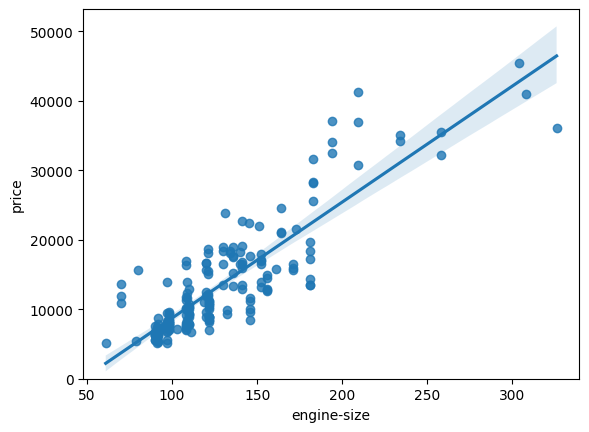

In [ ]:
sns.regplot(x = "engine-size", y = "price", data = df)
plt.ylim(0,)

 In this example, you can see that the straight line through the data points is very steep, which shows that there is a positive linear relationship between the two variables.

 With increase in values of engine size, values of price go up as well, and the slope of the line is positive. So there is a positive correlation between engine size and price.

As another example, now let's look at the relationship between highway miles per gallon to see its impact on the car price.

(0.0, 48174.689510417236)

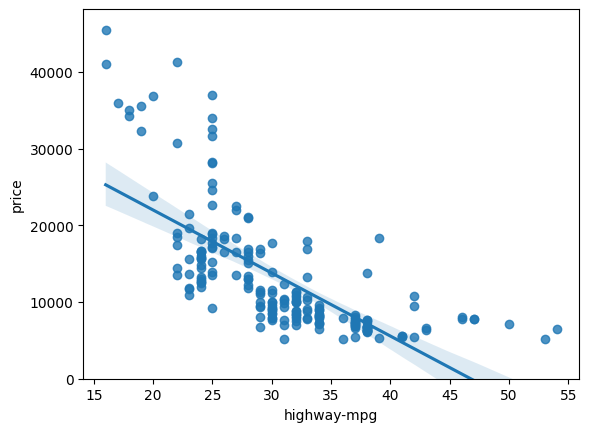

In [ ]:
sns.regplot(x ="highway-mpg", y = "price", data = df)
plt.ylim(0,)

As we can see in this plot, when highway miles per gallon value goes up, the value of price goes down. Therefore, there is a negative linear relationship between highway miles per gallon and price. Although this relationship is negative, the slope of the line is steep, which means that the highway miles per gallon is still a good predictor of price. These two variables are said to have a negative correlation.

In [ ]:
df.head()

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,3,2,164.0,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,4,2,164.0,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


(0.0, 47414.1)

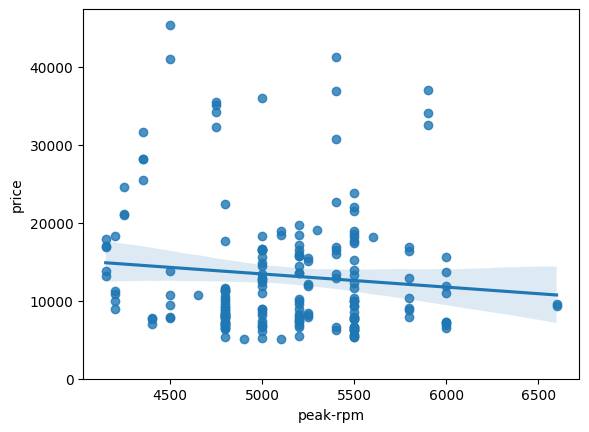

In [ ]:
#Weak Correlation
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0,)

Finally, we have an example of a weak correlation. For example, both low peak RPM and high values of peak RPM have low and high prices. Therefore, we cannot use RPM to predict the values.

# **Correlation Statistics**

correlation statistical methods.

One way to measure the strength of the correlation between continuous numerical variables is by using a method called Pearson Correlation.

Pearson Correlation method will give you two values;
*   correlation coefficient
*   p-value

How do we interpret these values?

For the correlation coefficient, a value close to one implies a large positive correlation, while a value close to -1 implies a large negative correlation, and a value close to zero implies no correlation between the variables.

Next, the p-value will tell us how certain we are about the correlation that we calculated.


For the p-value, a value less than 0.001 gives us a strong certainty about the correlation coefficient that we calculated, a value between 0.001 and 0.05 gives us moderate certainty, a value between 0.05 and 0.1 will give us a weak certainty, and a p-value larger than 0.1 will give us no certainty of correlation at all.


We can say that there is a strong correlation when the correlation coefficient is close to one or -1 and the p-value is less than 0.001.

In [ ]:
# In this example, we want to look at the correlation between the variables horsepower and car price.

# Remove rows with NaN or infinite values
df_cleaned = df[["horsepower", "price"]].dropna()
df_cleaned = df_cleaned[np.isfinite(df_cleaned).all(1)]

# Calculate Pearson correlation
pearson_coef, p_value = stats.pearsonr(df_cleaned["horsepower"], df_cleaned["price"])
pearson_coef, p_value

(0.8105330821322061, 1.189127827694721e-47)

 See how easy you can calculate the Pearson Correlation using the Scipy stats package?

 We can see that the correlation coefficient is approximately 0.8 and this is close to one, so there's a strong positive correlation. We can also see that the p-value is very small, much smaller than 0.001, and so we can conclude that we are certain about the strong positive correlation.



Taking all variables into account, we can now create a heat map that indicates the correlation between each of the variables with one another.

In [ ]:
df_numeric = df.select_dtypes(include=[float, int])
corr_matrix = df_numeric.corr()
corr_matrix

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
Unnamed: 0,1.000000,-0.161862,-0.270700,0.125728,0.162374,0.044613,0.251376,0.065501,-0.046752,0.247975,-0.164031,0.144770,-0.022566,-0.198725,0.027644,0.020049,-0.117889
symboling,-0.161862,1.000000,0.528667,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.144324,-0.008245,-0.182196,0.076038,0.280635,-0.035527,0.036233,-0.082391
normalized-losses,-0.270700,0.528667,1.000000,-0.074362,0.023220,0.105073,-0.432335,0.119893,0.167365,-0.036167,0.065627,-0.132654,0.295772,0.264597,-0.258502,-0.210768,0.203254
wheel-base,0.125728,-0.535987,-0.074362,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.494884,0.158502,0.250313,0.371621,-0.360593,-0.470606,-0.543304,0.584642
length,0.162374,-0.365404,0.023220,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610051,0.124139,0.159733,0.580309,-0.286321,-0.665192,-0.698142,0.690628
width,0.044613,-0.242423,0.105073,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544924,0.188829,0.189867,0.615315,-0.245975,-0.633531,-0.680635,0.751265
height,0.251376,-0.550160,-0.432335,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.185907,-0.062704,0.259737,-0.087407,-0.311574,-0.049800,-0.104812,0.135486
curb-weight,0.065501,-0.233118,0.119893,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644617,0.167562,0.156433,0.758063,-0.279375,-0.749543,-0.794889,0.834415
engine-size,-0.046752,-0.110581,0.167365,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.582857,0.209523,0.028889,0.822713,-0.256773,-0.650546,-0.679571,0.872335
bore,0.247975,-0.144324,-0.036167,0.494884,0.610051,0.544924,0.185907,0.644617,0.582857,1.000000,-0.055390,0.001250,0.568527,-0.277662,-0.592655,-0.599218,0.543436


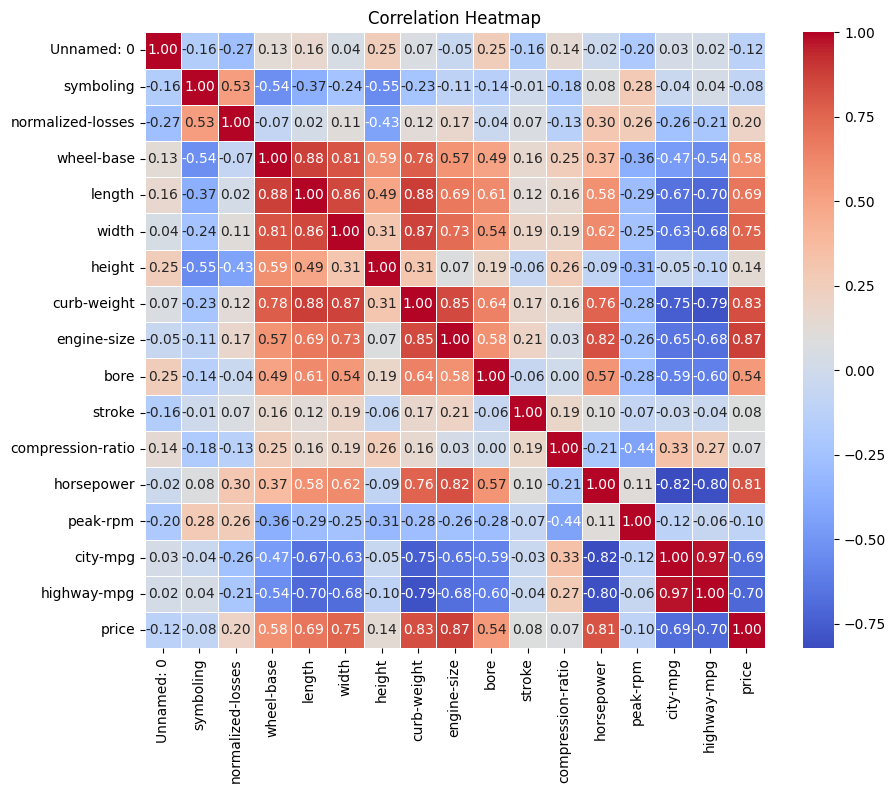

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

The color scheme indicates the Pearson correlation coefficient, indicating the strength of the correlation between two variables. We can see a diagonal line with a dark red color indicating that all the values on this diagonal are highly correlated. This makes sense because when you look closer, the values on the diagonal are the correlation of all variables with themselves, which will be always one. This correlation heat map gives us a good overview of how the different variables are related to one another, and most importantly, how these variables are related to price.